# Updated Bing Lexicon

## Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import os
import glob
import nltk
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## Import and Appending Dataset in a Single Dataframe

In [2]:
def isNotNull(value):
    return value is not None and len(value)>0

neg_file = []
os.chdir('C:\\the\\neg')
for file in glob.glob('*.txt'):
    neg_file.append(file)
neg_content = []
for i in range(len(neg_file)):
    txt = open(neg_file[i])
    neg_content.append(txt.read())
    
pos_file = []
os.chdir('C:\\the\\pos')
for file in glob.glob('*.txt'):
    pos_file.append(file)
pos_content = []
for i in range(len(pos_file)):
    txt = open(pos_file[i])
    pos_content.append(txt.read())
    
    
    
Bing_senti = pd.DataFrame()
Bing_senti['pos'] = pos_content
Bing_senti['neg'] = neg_content
Bing_senti.head()
Bing_senti

,pos,neg
0,fucking legend!!,all report tinker\n
1,what a pro player,it definitely is gg\n
2,GGWP ggwp good game,gggggggggggggggggggggggggggggggggggggggggggg
3,immortal god,?????????????????????????????
4,teach me pro,noob noob
...,...,...
995,wow ! what a movie . \nit's everything a movie...,ez\n
996,wow gyro got aghas\n,fucking dogs\n
997,Can you guys deni mid tower\n,What a noob dogh\n
998,has gem walked intio bomb \n,End\n


## Importing and appending lexicon dataset

In [3]:
os.chdir('C:\\the')
dict_pos = []
dict_neg = []
f = open('negative-words-updated.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_neg.append(t)
f.close()

f = open('positive-words-updated.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()

## Sentimental Analysis

### Tokenization and Analyzer

In [4]:
analysis_for_pos = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(pos_content[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_pos.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_pos'] = analysis_for_pos


analysis_for_neg = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(neg_content[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_neg.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_neg'] = analysis_for_neg

In [5]:
Bing_senti.head()

,pos,neg,Bing_analysis_for_pos,Bing_analysis_for_neg
0,fucking legend!!,all report tinker\n,1,-1
1,what a pro player,it definitely is gg\n,1,-1
2,GGWP ggwp good game,gggggggggggggggggggggggggggggggggggggggggggg,2,0
3,immortal god,?????????????????????????????,0,-1
4,teach me pro,noob noob,1,-1


## Distribution Graph

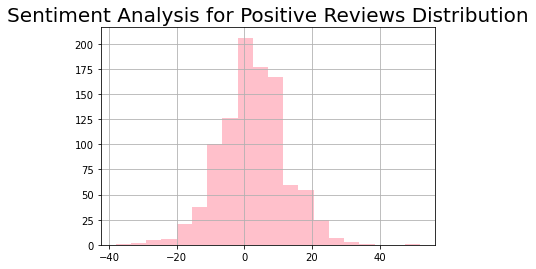

In [6]:
Bing_senti.Bing_analysis_for_pos.hist(bins = 20,color = 'pink')
plt.title('Sentiment Analysis for Positive Reviews Distribution',fontsize = 20)
plt.show()

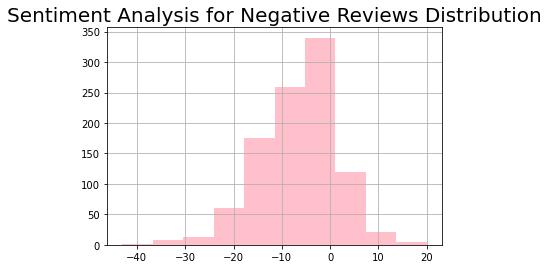

In [7]:
Bing_senti.Bing_analysis_for_neg.hist(color = 'pink')
plt.title('Sentiment Analysis for Negative Reviews Distribution',fontsize = 20)
plt.show()

## Defining Label

In [8]:
neg_analysis_label = []
for i in analysis_for_neg:
    if i >0:
        neg_analysis_label.append(1)
    else:
        neg_analysis_label.append(0)
        
pos_analysis_label = []
for i in analysis_for_pos:
    if i >0:
        pos_analysis_label.append(1)
    else:
        pos_analysis_label.append(0)

### Analysis Table

In [9]:
Bing_senti['analysis_label_for_neg'] = neg_analysis_label
Bing_senti['analysis_label_for_pos'] = pos_analysis_label
Bing_senti['label_for_neg'] = [0]*len(Bing_senti)
Bing_senti['label_for_pos'] = [1]*len(Bing_senti)
Bing_senti.head()

,pos,neg,Bing_analysis_for_pos,Bing_analysis_for_neg,analysis_label_for_neg,analysis_label_for_pos,label_for_neg,label_for_pos
0,fucking legend!!,all report tinker\n,1,-1,0,1,0,1
1,what a pro player,it definitely is gg\n,1,-1,0,1,0,1
2,GGWP ggwp good game,gggggggggggggggggggggggggggggggggggggggggggg,2,0,0,1,0,1
3,immortal god,?????????????????????????????,0,-1,0,0,0,1
4,teach me pro,noob noob,1,-1,0,1,0,1


In [10]:
Bing_analysis = Bing_senti.analysis_label_for_neg.tolist() + Bing_senti.analysis_label_for_pos.tolist()
True_label = Bing_senti.label_for_neg.tolist() + Bing_senti.label_for_pos.tolist()

### Confusion Matrix

In [11]:
confusion_matrix(True_label,Bing_analysis)

array([[829, 171],
       [398, 602]], dtype=int64)

<AxesSubplot:>

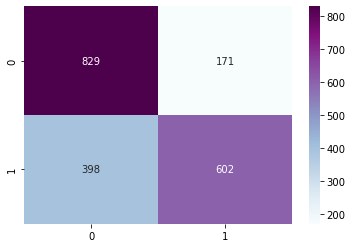

In [12]:
cnf_mat = confusion_matrix(True_label,Bing_analysis)
np.set_printoptions(precision=2)
sns.heatmap(cnf_mat, annot=True, fmt='d', cmap='BuPu')

### Evaluation Parameters

In [13]:
classification_report(True_label,Bing_analysis)

'              precision    recall  f1-score   support\n\n           0       0.68      0.83      0.74      1000\n           1       0.78      0.60      0.68      1000\n\n    accuracy                           0.72      2000\n   macro avg       0.73      0.72      0.71      2000\nweighted avg       0.73      0.72      0.71      2000\n'